In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

file_path = "/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv"
data = pd.read_csv(file_path)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

Розрахуємо математичне очікування та дисперсія та побудуємо графіки щільності за кожним параметром.

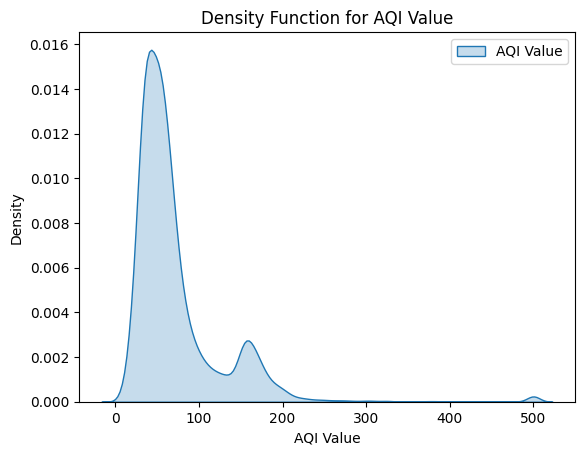

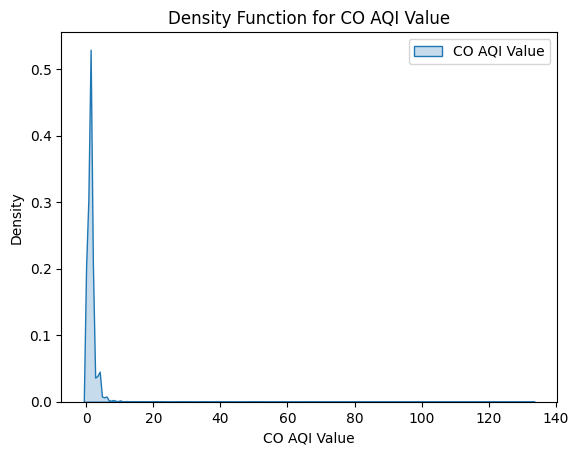

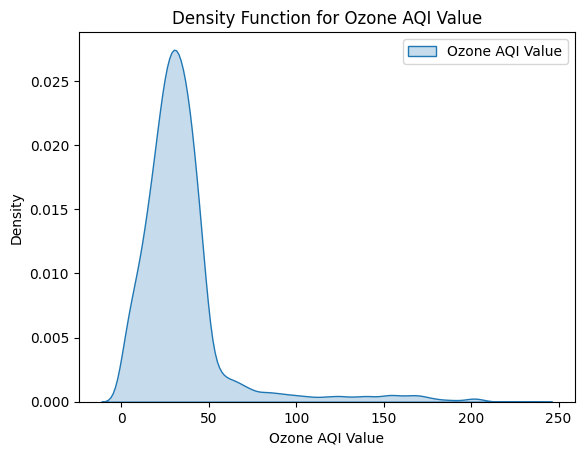

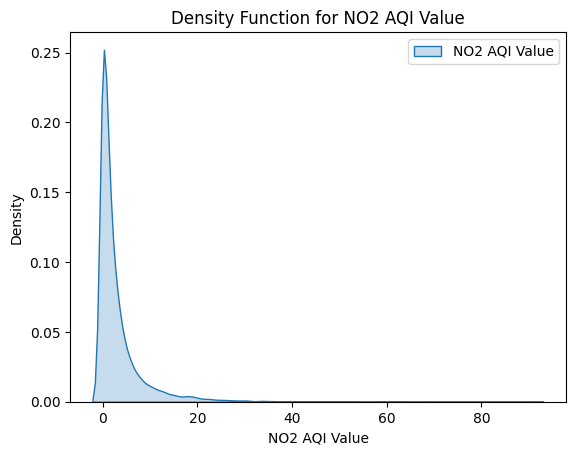

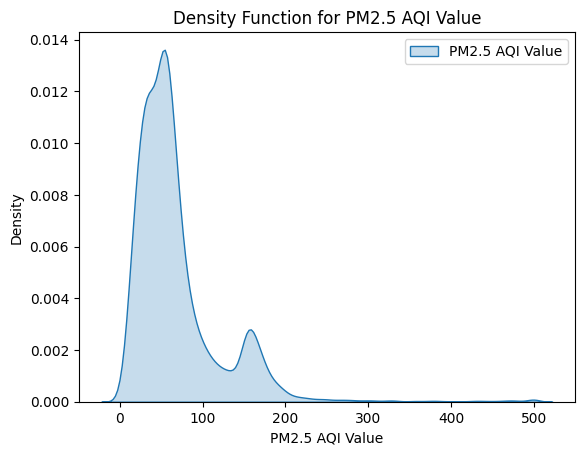

Mean AQI values for different pollutants:
AQI Value          72.344693
CO AQI Value        1.376254
Ozone AQI Value    35.233905
NO2 AQI Value       3.084741
PM2.5 AQI Value    68.883482
dtype: float64

Variance of AQI values for different pollutants:
AQI Value          3176.561394
CO AQI Value          3.403751
Ozone AQI Value     797.306318
NO2 AQI Value        27.896439
PM2.5 AQI Value    3031.316891
dtype: float64


In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    pollutants = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
    for pollutant in pollutants:
        plt.figure()
        sns.kdeplot(data[pollutant], shade=True, label=pollutant)
        plt.title(f'Density Function for {pollutant}')
        plt.xlabel(pollutant)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# Обчислення середнього значення та дисперсії для кожного забруднювача
mean_values = data[pollutants].mean()
variance_values = data[pollutants].var()

# Відображення середнього значення та дисперсії
print("Mean AQI values for different pollutants:")
print(mean_values)
print("\nVariance of AQI values for different pollutants:")
print(variance_values)

Для фільтрації викидів з даних індексу якості повітря (AQI) для різних забруднюючих речовин скористаємось методом міжквартильного діапазону (IQR), а потім побудуємо графік функцій щільності для відфільтрованих даних. У процесі аналізу даних довелось по-різному обробляти дані, а саме: для `CO AQI Value` фільтрація не застосовується, тоді як для `NO2 AQI Value` використовуємо вищий поріг для видалення викидів.

Pollutant: AQI Value
Original data count: 23035
Filtered data count: 20160
Original data range: 6 - 500
Filtered data range: 6 - 141



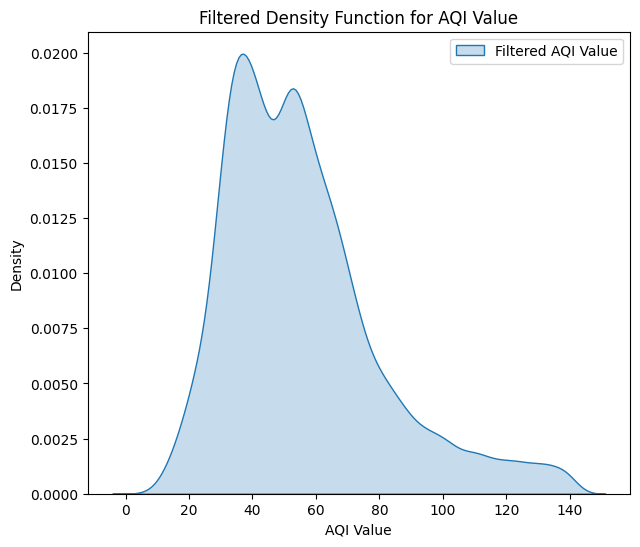

Pollutant: CO AQI Value
Original data count: 23035
Filtered data count: 23035
Original data range: 0 - 133
Filtered data range: 0 - 133



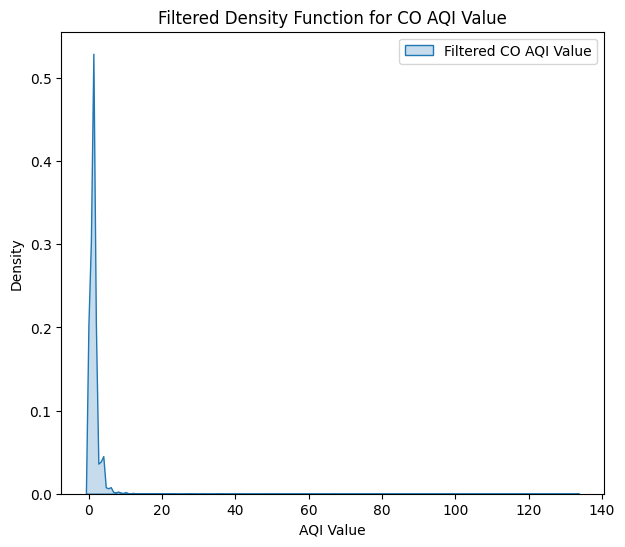

Pollutant: Ozone AQI Value
Original data count: 23035
Filtered data count: 21535
Original data range: 0 - 235
Filtered data range: 0 - 68



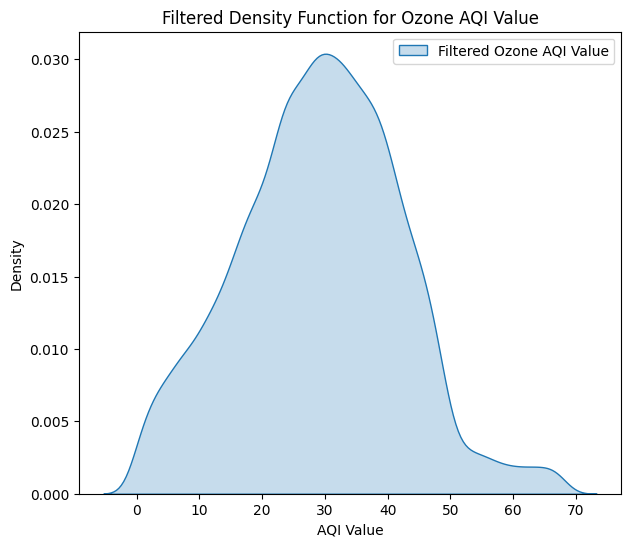

Pollutant: NO2 AQI Value
Original data count: 23035
Filtered data count: 22263
Original data range: 0 - 91
Filtered data range: 0 - 16



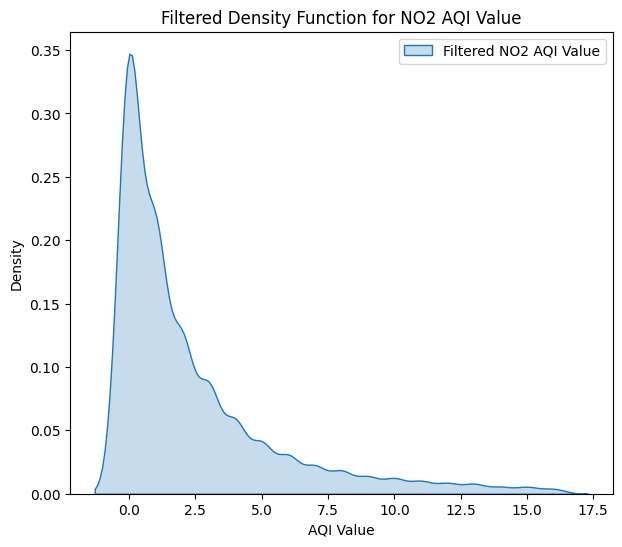

Pollutant: PM2.5 AQI Value
Original data count: 23035
Filtered data count: 20407
Original data range: 0 - 500
Filtered data range: 0 - 145



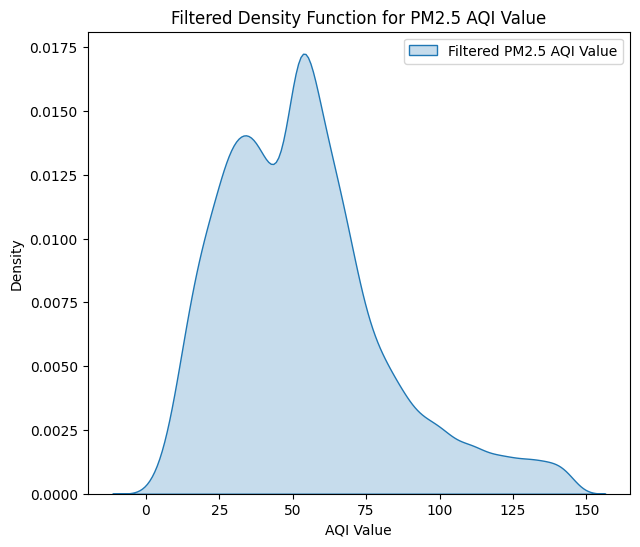

In [3]:
def filter_outliers(series, method='iqr', threshold=1.5):
    if method == 'iqr':
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
    elif method == 'std':
        mean = series.mean()
        std_dev = series.std()
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
    return series[(series >= lower_bound) & (series <= upper_bound)]

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    pollutants = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
    
    for pollutant in pollutants:
        original_data = data[pollutant]
        
        if pollutant == 'CO AQI Value':
            # Skip filtering or use less aggressive method for CO AQI Value
            filtered_data = original_data.dropna()
        elif pollutant == 'NO2 AQI Value':
            filtered_data = filter_outliers(original_data, method='iqr', threshold=3)  # Using higher IQR threshold
        else:
            filtered_data = filter_outliers(original_data)
        
        print(f"Pollutant: {pollutant}")
        print(f"Original data count: {original_data.count()}")
        print(f"Filtered data count: {filtered_data.count()}")
        print(f"Original data range: {original_data.min()} - {original_data.max()}")
        print(f"Filtered data range: {filtered_data.min()} - {filtered_data.max()}")
        print("")
        
        plt.figure(figsize=(7, 6))
        
        sns.kdeplot(filtered_data, shade=True, label=f'Filtered {pollutant}')
        plt.title(f'Filtered Density Function for {pollutant}')
        plt.xlabel('AQI Value')
        plt.ylabel('Density')
        plt.legend()

        plt.show()

Дивлячись на отримані результати можна зробити такі висновки:

`AQI Value` - видалення викидів зберегло основну масу даних, що призвело до відносно гладкого та широкого розкиду.

`CO AQI Value` - фільтрування було пропущено, тому функція щільності відображає повний діапазон даних, включаючи викиди. Проте середнє значення та дисперсія вказують на те, що більшість точок даних є дуже низькими, з кількома вищими викидами.

`Ozone AQI Value` - після фільтрації графік щільності показує розподіл із значеннями, які здебільшого нижчі за 68, видаляючи надзвичайно високі викиди та забезпечуючи чіткіше уявлення про центральну тенденцію.

`NO2 AQI Value` - вищий поріг інтерквартильного діапазону допомагає зберегти більше значень. Функція щільності показує вузький діапазон, що вказує на те, що дані мають відносно низькі значення AQI для показника NO2, а кілька високих значень відфільтровано.

`PM2.5 AQI Value` - діаграма щільності показує значення переважно нижче 145, видаляючи високі викиди. Це все ще підтримує значний діапазон, що вказує на мінливість у межах типових значень.

# Висновки
Загалом, отримані середні значення відображають оптимальні значення AQI для різних забруднюючих речовин. `CO AQI Value` і `NO2 AQI Value` мають низькі середні значення, що вказує на низькі рівні забруднення цими параметрами. `Ozone AQI Value`, `PM2.5 AQI Value` мають вищі середні значення, що вказує на вищі рівні забруднення.